In [2]:
import pandas as pd
import numpy as np

import warnings
import missingno as mg
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from mlxtend.classifier import StackingClassifier
from imblearn.over_sampling import SMOTE

import seaborn as sns
sns.set(color_codes=True)
import json

warnings.filterwarnings('ignore')
import sklearn as sk

from sklearn.metrics import accuracy_score,roc_auc_score,auc

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

from feature_selector import FeatureSelector
import tpot
from tensorflow.keras.layers import LSTM

In [3]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\泰迪杯\泰迪杯\5f0bd422931fa901bf76b22aea303a8f\训练数据.csv')
# df1= pd.read_excel(r'C:\Users\Admin\Desktop\泰迪杯\泰迪杯\附件1.xlsx')


In [4]:
# df.select_dtypes(include = object)

# df.dtypes[df.dtypes == 'object']

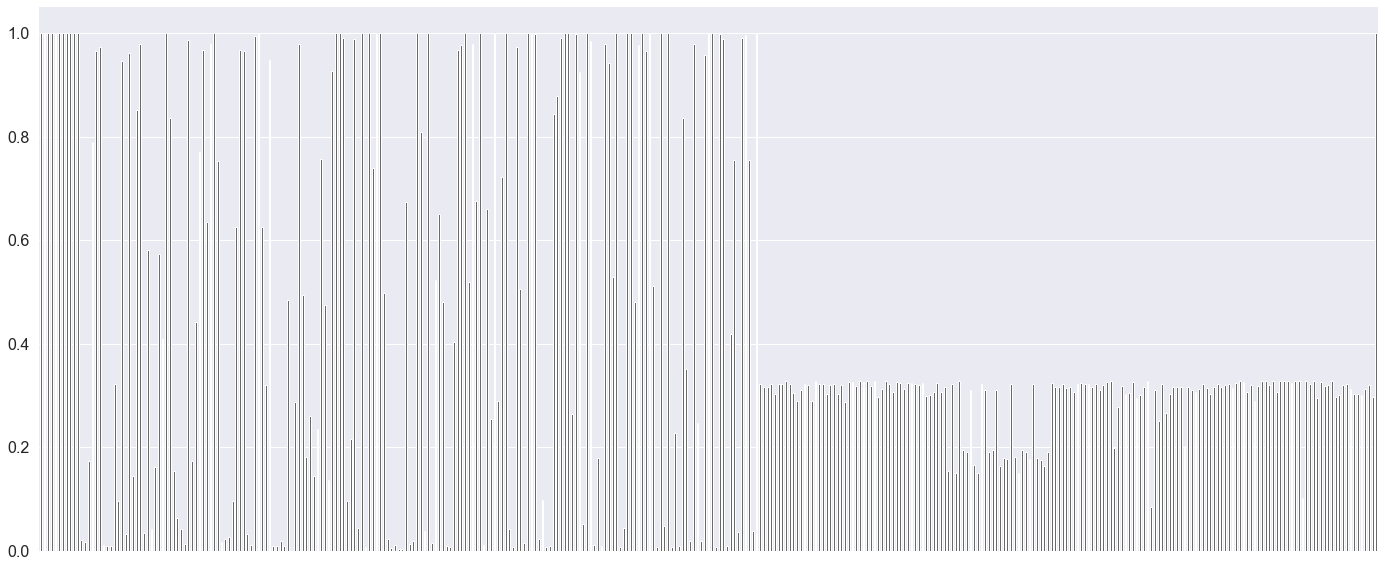

In [5]:
mg.bar(df)

In [6]:
df

,TICKER_SYMBOL,ACT_PUBTIME,PUBLISH_DATE,END_DATE_REP,END_DATE,REPORT_TYPE,FISCAL_PERIOD,MERGED_FLAG,ACCOUTING_STANDARDS,CURRENCY_CD,...,CA_TURNOVER,OPER_CYCLE,INVEN_TURNOVER,FA_TURNOVER,TFA_TURNOVER,DAYS_AP,DAYS_INVEN,TA_TURNOVER,AR_TURNOVER,FLAG
0,4019,3,3,2,1,A,12,1,CHAS_2007,CNY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,8166,3,3,2,1,A,12,1,CHAS_2007,CNY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,9063,3,3,2,1,A,12,1,CHAS_2007,CNY,...,1.3751,148.8938,7.4240,20.9362,15.2980,75.4337,48.4911,1.2774,3.5856,0.0
3,10083,4,4,4,1,A,12,1,CHAS_2007,CNY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,11737,3,3,2,1,A,12,1,CHAS_2007,CNY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18055,4993201,7,7,6,5,A,12,1,CHAS_2007,CNY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
18056,4993297,7,7,6,5,A,12,1,CHAS_2007,CNY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
18057,4997833,7,7,6,5,A,12,1,CHAS_2007,CNY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
18058,4998808,7,7,6,5,A,12,1,CHAS_2007,CNY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


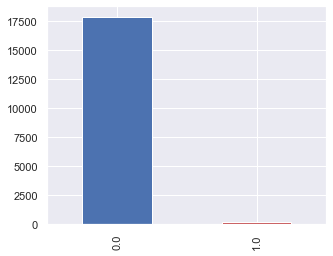

In [7]:
#标签分布图
df.FLAG.value_counts().plot(kind = 'bar',figsize = (5,4),
                            color = ['b','r'],
                            grid = True,  
                           )


In [8]:
# fig,ax = plt.subplots(1,2)
# sns.countplot(x = df.FLAG,ax = ax[0])


In [9]:
def del_cols(df):          #列缺失值个数超过60%就删除
    t = int(0.4*df.shape[0]) 
    df = df.dropna(thresh = t,axis = 1)
    return df

In [10]:
df = del_cols(df)

In [11]:
df

,TICKER_SYMBOL,ACT_PUBTIME,PUBLISH_DATE,END_DATE_REP,END_DATE,REPORT_TYPE,FISCAL_PERIOD,MERGED_FLAG,ACCOUTING_STANDARDS,CURRENCY_CD,...,N_INCOME,BIZ_TAX_SURCHG,NOPERATE_EXP,GOING_CONCERN_NI,COMPR_INC_ATTR_M_S,INCOME_TAX,NOPERATE_INCOME,MINORITY_GAIN,T_COGS,FLAG
0,4019,3,3,2,1,A,12,1,CHAS_2007,CNY,...,1.054685e+08,1.505596e+06,224194.93,NaN,NaN,1.950914e+07,16781651.83,NaN,3.885748e+08,0.0
1,8166,3,3,2,1,A,12,1,CHAS_2007,CNY,...,3.626590e+08,2.821351e+07,1071702.74,NaN,NaN,5.256371e+07,22480726.69,NaN,4.930772e+09,0.0
2,9063,3,3,2,1,A,12,1,CHAS_2007,CNY,...,8.174721e+08,2.377917e+08,19997626.17,NaN,-9.976394e+05,1.500600e+08,51570559.53,-9.976394e+05,3.045615e+10,0.0
3,10083,4,4,4,1,A,12,1,CHAS_2007,CNY,...,3.682732e+07,7.915864e+06,382566.13,NaN,NaN,1.322933e+07,1030374.09,NaN,3.054139e+08,0.0
4,11737,3,3,2,1,A,12,1,CHAS_2007,CNY,...,3.479212e+08,8.298888e+06,633458.95,NaN,2.172267e+07,3.640445e+07,60365828.87,2.172267e+07,1.384902e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18055,4993201,7,7,6,5,A,12,1,CHAS_2007,CNY,...,1.025446e+08,1.084947e+07,630563.89,1.025446e+08,-7.256544e+06,1.588685e+07,1761987.18,-7.256544e+06,1.330294e+09,0.0
18056,4993297,7,7,6,5,A,12,1,CHAS_2007,CNY,...,3.591666e+08,8.647501e+06,727703.45,3.591666e+08,4.712881e+07,6.227955e+06,3301533.05,4.739598e+07,1.084352e+09,0.0
18057,4997833,7,7,6,5,A,12,1,CHAS_2007,CNY,...,7.221726e+07,3.042865e+06,563800.21,7.221726e+07,NaN,1.172596e+07,5666934.76,NaN,2.916659e+08,0.0
18058,4998808,7,7,6,5,A,12,1,CHAS_2007,CNY,...,5.644882e+07,3.530369e+07,494758.33,5.644882e+07,-3.731678e+06,2.987076e+06,232451.48,-3.723846e+06,1.343816e+09,0.0


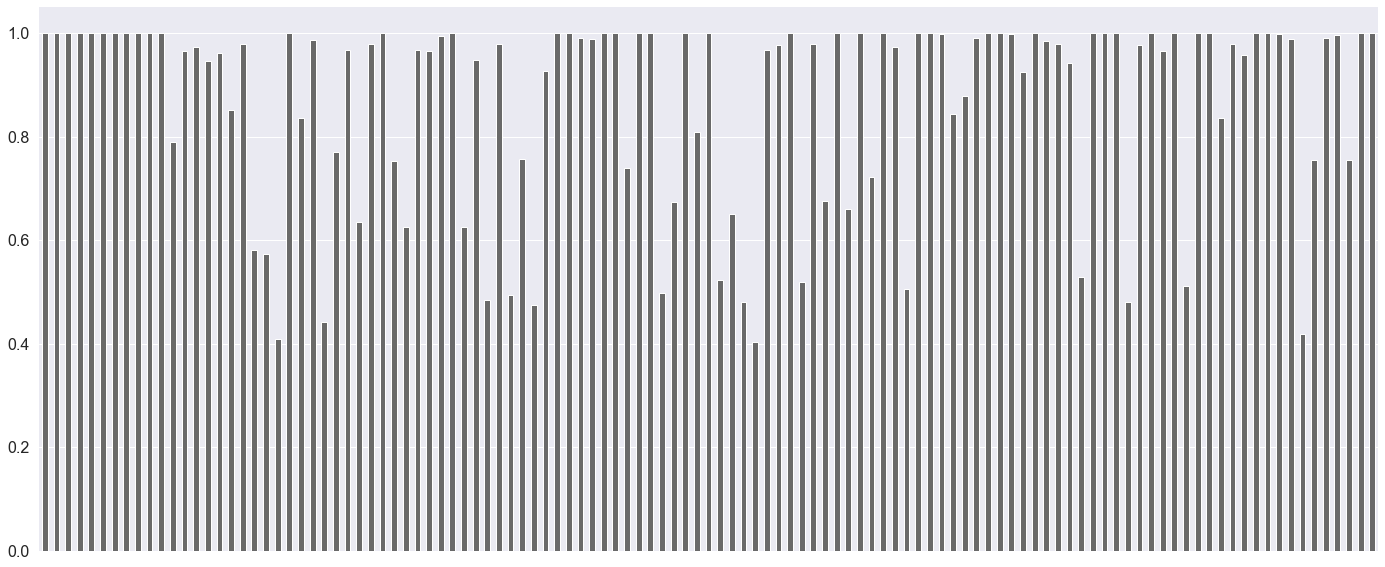

In [12]:
mg.bar(df)

In [13]:
df.isnull().sum()

TICKER_SYMBOL         0
ACT_PUBTIME           0
PUBLISH_DATE          0
END_DATE_REP          0
END_DATE              0
                   ... 
INCOME_TAX          187
NOPERATE_INCOME      76
MINORITY_GAIN      4415
T_COGS                1
FLAG                  0
Length: 115, dtype: int64

In [14]:
def del_rows(df):            #行缺失值个数超过50%就删除
    t = int(0.5*df.shape[1])
    df = df.dropna(thresh = t,axis = 0)
    return df

In [15]:
df = del_rows(df) 

In [16]:
df

,TICKER_SYMBOL,ACT_PUBTIME,PUBLISH_DATE,END_DATE_REP,END_DATE,REPORT_TYPE,FISCAL_PERIOD,MERGED_FLAG,ACCOUTING_STANDARDS,CURRENCY_CD,...,N_INCOME,BIZ_TAX_SURCHG,NOPERATE_EXP,GOING_CONCERN_NI,COMPR_INC_ATTR_M_S,INCOME_TAX,NOPERATE_INCOME,MINORITY_GAIN,T_COGS,FLAG
0,4019,3,3,2,1,A,12,1,CHAS_2007,CNY,...,1.054685e+08,1.505596e+06,224194.93,NaN,NaN,1.950914e+07,16781651.83,NaN,3.885748e+08,0.0
1,8166,3,3,2,1,A,12,1,CHAS_2007,CNY,...,3.626590e+08,2.821351e+07,1071702.74,NaN,NaN,5.256371e+07,22480726.69,NaN,4.930772e+09,0.0
2,9063,3,3,2,1,A,12,1,CHAS_2007,CNY,...,8.174721e+08,2.377917e+08,19997626.17,NaN,-9.976394e+05,1.500600e+08,51570559.53,-9.976394e+05,3.045615e+10,0.0
3,10083,4,4,4,1,A,12,1,CHAS_2007,CNY,...,3.682732e+07,7.915864e+06,382566.13,NaN,NaN,1.322933e+07,1030374.09,NaN,3.054139e+08,0.0
4,11737,3,3,2,1,A,12,1,CHAS_2007,CNY,...,3.479212e+08,8.298888e+06,633458.95,NaN,2.172267e+07,3.640445e+07,60365828.87,2.172267e+07,1.384902e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18055,4993201,7,7,6,5,A,12,1,CHAS_2007,CNY,...,1.025446e+08,1.084947e+07,630563.89,1.025446e+08,-7.256544e+06,1.588685e+07,1761987.18,-7.256544e+06,1.330294e+09,0.0
18056,4993297,7,7,6,5,A,12,1,CHAS_2007,CNY,...,3.591666e+08,8.647501e+06,727703.45,3.591666e+08,4.712881e+07,6.227955e+06,3301533.05,4.739598e+07,1.084352e+09,0.0
18057,4997833,7,7,6,5,A,12,1,CHAS_2007,CNY,...,7.221726e+07,3.042865e+06,563800.21,7.221726e+07,NaN,1.172596e+07,5666934.76,NaN,2.916659e+08,0.0
18058,4998808,7,7,6,5,A,12,1,CHAS_2007,CNY,...,5.644882e+07,3.530369e+07,494758.33,5.644882e+07,-3.731678e+06,2.987076e+06,232451.48,-3.723846e+06,1.343816e+09,0.0


In [17]:
df.duplicated().sum() #检测重复值 ，0个重复值

0

In [18]:
df = df.fillna(0)  #用0填充

In [19]:
df.isnull().sum()

TICKER_SYMBOL      0
ACT_PUBTIME        0
PUBLISH_DATE       0
END_DATE_REP       0
END_DATE           0
                  ..
INCOME_TAX         0
NOPERATE_INCOME    0
MINORITY_GAIN      0
T_COGS             0
FLAG               0
Length: 115, dtype: int64

In [20]:
# df = df.drop(df[['REPORT_TYPE','ACCOUTING_STANDARDS','CURRENCY_CD']],axis = 1) #,inplace = True



In [21]:
df.dtypes[df.dtypes == 'object']

REPORT_TYPE            object
ACCOUTING_STANDARDS    object
CURRENCY_CD            object
dtype: object

In [22]:
# df = df.iloc[1:,:]
df

,TICKER_SYMBOL,ACT_PUBTIME,PUBLISH_DATE,END_DATE_REP,END_DATE,REPORT_TYPE,FISCAL_PERIOD,MERGED_FLAG,ACCOUTING_STANDARDS,CURRENCY_CD,...,N_INCOME,BIZ_TAX_SURCHG,NOPERATE_EXP,GOING_CONCERN_NI,COMPR_INC_ATTR_M_S,INCOME_TAX,NOPERATE_INCOME,MINORITY_GAIN,T_COGS,FLAG
0,4019,3,3,2,1,A,12,1,CHAS_2007,CNY,...,1.054685e+08,1.505596e+06,224194.93,0.000000e+00,0.000000e+00,1.950914e+07,16781651.83,0.000000e+00,3.885748e+08,0.0
1,8166,3,3,2,1,A,12,1,CHAS_2007,CNY,...,3.626590e+08,2.821351e+07,1071702.74,0.000000e+00,0.000000e+00,5.256371e+07,22480726.69,0.000000e+00,4.930772e+09,0.0
2,9063,3,3,2,1,A,12,1,CHAS_2007,CNY,...,8.174721e+08,2.377917e+08,19997626.17,0.000000e+00,-9.976394e+05,1.500600e+08,51570559.53,-9.976394e+05,3.045615e+10,0.0
3,10083,4,4,4,1,A,12,1,CHAS_2007,CNY,...,3.682732e+07,7.915864e+06,382566.13,0.000000e+00,0.000000e+00,1.322933e+07,1030374.09,0.000000e+00,3.054139e+08,0.0
4,11737,3,3,2,1,A,12,1,CHAS_2007,CNY,...,3.479212e+08,8.298888e+06,633458.95,0.000000e+00,2.172267e+07,3.640445e+07,60365828.87,2.172267e+07,1.384902e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18055,4993201,7,7,6,5,A,12,1,CHAS_2007,CNY,...,1.025446e+08,1.084947e+07,630563.89,1.025446e+08,-7.256544e+06,1.588685e+07,1761987.18,-7.256544e+06,1.330294e+09,0.0
18056,4993297,7,7,6,5,A,12,1,CHAS_2007,CNY,...,3.591666e+08,8.647501e+06,727703.45,3.591666e+08,4.712881e+07,6.227955e+06,3301533.05,4.739598e+07,1.084352e+09,0.0
18057,4997833,7,7,6,5,A,12,1,CHAS_2007,CNY,...,7.221726e+07,3.042865e+06,563800.21,7.221726e+07,0.000000e+00,1.172596e+07,5666934.76,0.000000e+00,2.916659e+08,0.0
18058,4998808,7,7,6,5,A,12,1,CHAS_2007,CNY,...,5.644882e+07,3.530369e+07,494758.33,5.644882e+07,-3.731678e+06,2.987076e+06,232451.48,-3.723846e+06,1.343816e+09,0.0


In [23]:
data = df.drop(['FLAG'],axis = 1)
labels = df['FLAG']
fs = FeatureSelector(data = data ,labels = labels)
fs.identify_zero_importance(task = 'classification',
    eval_metric='auc',
    n_iterations=10,
    early_stopping=True)
fs.identify_low_importance(0.99)
fs.identify_single_unique()
fs.identify_collinear(correlation_threshold = 0.99, one_hot=True)
df_remove = fs.remove(methods =['zero_importance', 'single_unique','collinear'],keep_one_hot=True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.795088	valid_0's binary_logloss: 0.0499399
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.829701	valid_0's binary_logloss: 0.0465186
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.79881	valid_0's binary_logloss: 0.0509389
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.773621	valid_0's binary_logloss: 0.0532596
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.770542	valid_0's binary_logloss: 0.0526
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.762518	valid_0's binary_logloss: 0.0497155

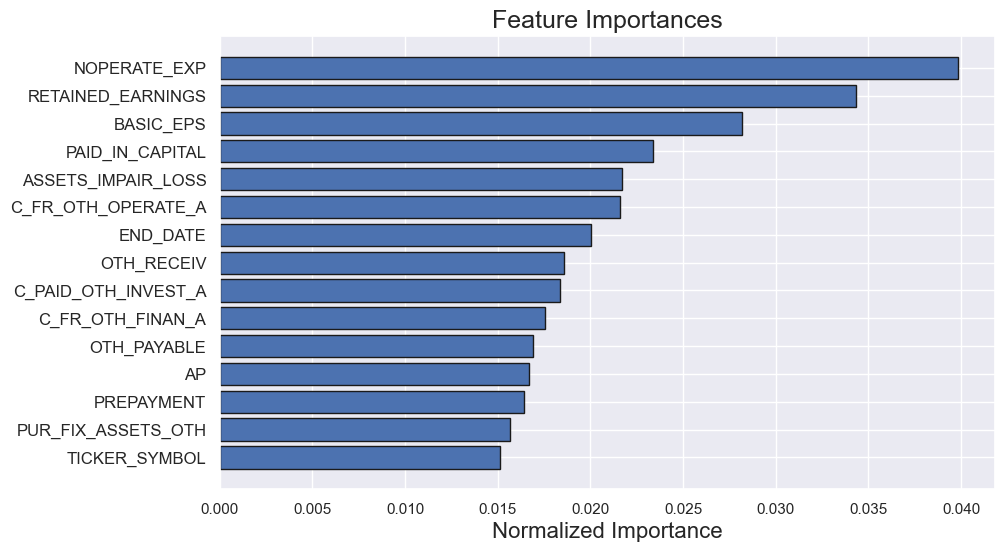

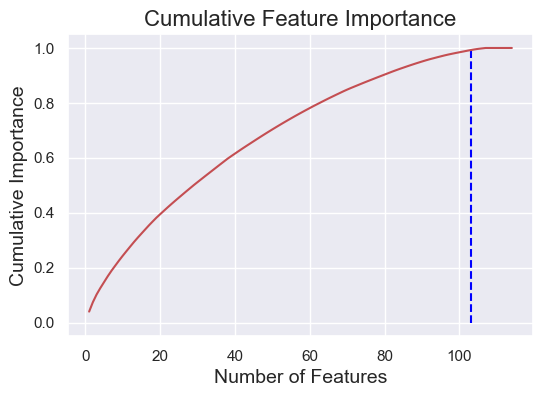

103 features required for 0.99 of cumulative importance


In [24]:
fs.plot_feature_importances(threshold = 0.99,plot_n = 15)

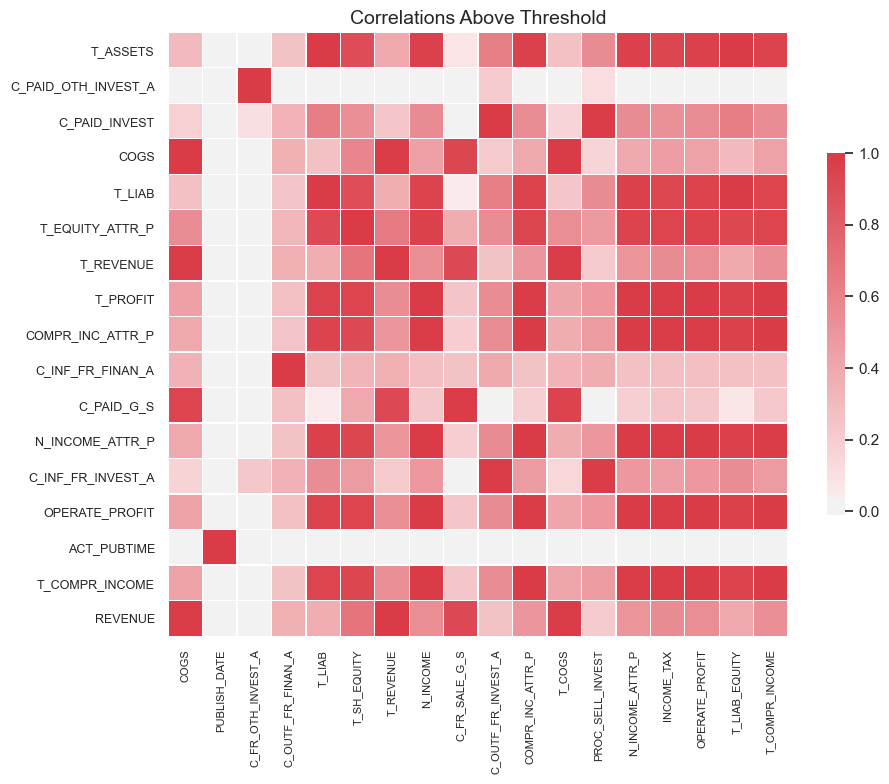

In [25]:
fs.plot_collinear()

In [26]:
df_remove

,TICKER_SYMBOL,ACT_PUBTIME,END_DATE_REP,END_DATE,CASH_C_EQUIV,NOTES_RECEIV,AR,PREPAYMENT,OTH_RECEIV,INVENTORIES,...,OTH_COMPR_INCOME,INVEST_INCOME,FINAN_EXP,SELL_EXP,BIZ_TAX_SURCHG,NOPERATE_EXP,GOING_CONCERN_NI,COMPR_INC_ATTR_M_S,NOPERATE_INCOME,MINORITY_GAIN
0,4019,3,2,1,6.719939e+08,1.643520e+08,3.451945e+08,1.039522e+07,3.584941e+06,9.372176e+07,...,0.000000e+00,1.749444e+07,-2.852499e+06,8.496995e+06,1.505596e+06,224194.93,0.000000e+00,0.000000e+00,16781651.83,0.000000e+00
1,8166,3,2,1,1.010981e+09,2.155752e+09,2.887470e+08,1.075202e+08,8.562676e+07,1.049809e+09,...,0.000000e+00,-7.383262e+05,-6.331650e+06,1.099762e+09,2.821351e+07,1071702.74,0.000000e+00,0.000000e+00,22480726.69,0.000000e+00
2,9063,3,2,1,5.308711e+09,1.201409e+08,8.334355e+07,1.068590e+09,1.998471e+08,1.890696e+09,...,0.000000e+00,1.663383e+07,-6.009423e+06,3.084704e+09,2.377917e+08,19997626.17,0.000000e+00,-9.976394e+05,51570559.53,-9.976394e+05
3,10083,4,4,1,3.929683e+07,0.000000e+00,3.117961e+08,1.379073e+06,2.154801e+06,4.826158e+07,...,0.000000e+00,-1.896579e+04,6.019472e+05,2.514797e+06,7.915864e+06,382566.13,0.000000e+00,0.000000e+00,1030374.09,0.000000e+00
4,11737,3,2,1,1.502023e+09,2.688988e+07,9.517806e+08,4.157376e+07,3.751924e+07,6.611381e+08,...,0.000000e+00,2.573565e+07,-2.061744e+07,1.294148e+08,8.298888e+06,633458.95,0.000000e+00,2.172267e+07,60365828.87,2.172267e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18055,4993201,7,6,5,2.598805e+08,1.944298e+06,1.482427e+08,1.409296e+07,4.711209e+06,3.085912e+08,...,-9.810186e+05,-1.802131e+06,2.502496e+07,1.453294e+08,1.084947e+07,630563.89,1.025446e+08,-7.256544e+06,1761987.18,-7.256544e+06
18056,4993297,7,6,5,6.886827e+08,9.753354e+06,6.268778e+08,5.084645e+06,8.516505e+06,3.489690e+07,...,-1.335860e+06,-9.118667e+06,1.217890e+08,0.000000e+00,8.647501e+06,727703.45,3.591666e+08,4.712881e+07,3301533.05,4.739598e+07
18057,4997833,7,6,5,2.116220e+08,0.000000e+00,1.445725e+08,1.553651e+06,5.519395e+06,0.000000e+00,...,0.000000e+00,3.052146e+06,2.891308e+05,1.490012e+07,3.042865e+06,563800.21,7.221726e+07,0.000000e+00,5666934.76,0.000000e+00
18058,4998808,7,6,5,7.139431e+08,1.390392e+07,6.543783e+08,7.145728e+07,3.231464e+06,1.136738e+09,...,7.281989e+06,1.239708e+06,1.422717e+08,4.889144e+07,3.530369e+07,494758.33,5.644882e+07,-3.731678e+06,232451.48,-3.723846e+06


In [27]:
x = df.drop(['FLAG'],axis = 1)
y = df['FLAG']


In [28]:
#归一化 

# from sklearn.preprocessing import MinMaxScaler 
# minmax = MinMaxScaler()
# x_minmax= minmax.fit_transform(df_remove)


In [29]:
#划分训练集,测试集

x_train,x_test,y_train,y_test =sk.model_selection.train_test_split(df_remove,labels, test_size =0.3, random_state=100) 


In [30]:
#SMOTE过采样

from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN
from  collections import Counter as count
sm =  SMOTE(random_state=0)
x_res, y_res = sm.fit_resample(x_train,y_train)
count(y_res)

Counter({0.0: 12517, 1.0: 12517})

In [31]:
x_res.shape,y_res.shape

((25034, 91), (25034,))

In [32]:
x_train.shape,y_train.shape

((12640, 91), (12640,))

In [33]:
import xgboost as xgb
xgb = xgb.XGBClassifier(
    n_estimators=203,
    learning_rate=0.06,  
    eval_metric = 'auc'
                        )                      # n_estimators=205,learning_rate=0.06
                                              # x_res, y_res  x_train,y_train
xgb.fit(x_res, y_res,eval_metric = 'auc')

y_xgb = xgb.predict(x_test)
auc = roc_auc_score(y_test,xgb.predict_proba(x_test)[:,1])
acc = accuracy_score(y_test,y_xgb)
print("auc:%.3f"%auc)
print("准确率:%.3f%%"%(acc*100))

auc:0.804
准确率:98.450%


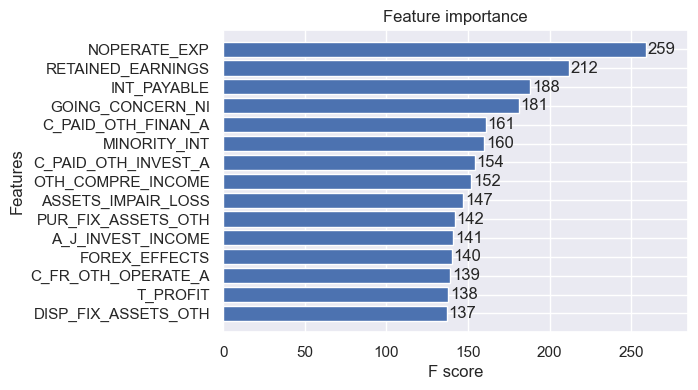

In [34]:
# 特征重要性
from xgboost import plot_importance
fig,ax = plt.subplots(figsize = (6,4))
plot_importance(xgb,height=.8,ax = ax ,max_num_features= 15)

In [316]:
df_remove_columns = df_remove.columns
df_fj1 =  pd.read_excel(r'C:\Users\Admin\Desktop\泰迪杯\泰迪杯\5f0bd422931fa901bf76b22aea303a8f\附件1.xlsx')
df_pre = pd.read_csv(r'C:\Users\Admin\Desktop\泰迪杯\泰迪杯\5f0bd422931fa901bf76b22aea303a8f\预测数据.csv',usecols = (lambda x:x in df_remove_columns))
df_pre = df_pre.fillna(0)
df_pre

,TICKER_SYMBOL,ACT_PUBTIME,END_DATE_REP,END_DATE,CASH_C_EQUIV,NOTES_RECEIV,AR,PREPAYMENT,OTH_RECEIV,INVENTORIES,...,OTH_COMPR_INCOME,INVEST_INCOME,FINAN_EXP,SELL_EXP,BIZ_TAX_SURCHG,NOPERATE_EXP,GOING_CONCERN_NI,COMPR_INC_ATTR_M_S,NOPERATE_INCOME,MINORITY_GAIN
0,4019,7,7,6,7.378026e+08,5.371288e+08,5.630101e+08,1.442407e+07,7.951387e+07,4.465565e+08,...,0.000000e+00,8.689533e+06,2.666247e+07,1.812804e+07,6.353385e+06,2835231.14,1.799870e+08,1.294080e+03,1407336.70,1.294080e+03
1,4213,7,7,6,1.943268e+08,2.638867e+07,5.230195e+07,1.086066e+08,2.499876e+06,3.121945e+08,...,0.000000e+00,3.321566e+06,3.123945e+06,9.606453e+07,6.828622e+06,5835723.55,7.665146e+07,-5.636811e+05,5003528.85,-5.636811e+05
2,8166,7,7,6,2.530356e+09,1.933565e+08,1.521159e+09,8.055628e+07,4.857763e+07,7.342139e+08,...,2.103464e+04,1.605538e+07,-6.847287e+07,1.034899e+09,3.878029e+07,6055131.67,2.618395e+08,0.000000e+00,3178545.64,0.000000e+00
3,9063,7,7,6,3.056279e+09,1.713467e+07,1.333822e+08,1.019097e+09,1.182687e+08,2.430716e+09,...,-1.761417e+07,2.824782e+08,6.087881e+07,3.693651e+09,2.283680e+08,28346496.15,8.741711e+08,4.302998e+07,16957733.85,4.302998e+07
4,10083,7,7,6,1.679323e+08,0.000000e+00,6.848635e+08,1.593352e+07,3.989963e+07,2.233907e+08,...,1.285095e+04,-1.759815e+04,2.352537e+06,9.492687e+06,3.285023e+06,1191014.48,4.897475e+07,-3.018873e+05,40083.49,-3.018873e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4148,4993201,7,7,6,1.383177e+08,2.065400e+06,2.356441e+08,2.378197e+07,1.080586e+07,3.880520e+08,...,-7.789369e+05,-9.056589e+06,2.343762e+07,1.783355e+08,1.813482e+07,4526795.07,9.218567e+07,-7.181958e+06,106277.29,-7.181958e+06
4149,4993297,7,7,6,1.650023e+09,9.172207e+06,7.816458e+08,3.984439e+06,1.004742e+07,3.824346e+07,...,1.103753e+06,-1.736407e+07,1.239539e+08,0.000000e+00,1.157960e+07,422831.47,3.611406e+08,4.671983e+07,2575978.36,4.649908e+07
4150,4997833,7,7,6,3.050589e+08,0.000000e+00,1.865095e+08,3.632999e+06,5.617647e+06,0.000000e+00,...,0.000000e+00,3.195958e+06,-2.770357e+06,1.885130e+07,3.756875e+06,89668.75,1.005249e+08,0.000000e+00,2364489.61,0.000000e+00
4151,4998808,7,7,6,1.636861e+09,1.315565e+06,6.862857e+08,5.058011e+07,0.000000e+00,1.247265e+09,...,-3.644794e+06,3.742458e+05,1.378823e+08,5.252299e+07,2.973275e+07,901275.67,6.794989e+07,-5.187878e+06,103999.48,-5.190868e+06


In [317]:
df_pre['FLAG'] = xgb.predict(df_pre)


In [318]:
df_pre['FLAG'].value_counts()

0.0    4145
1.0       8
Name: FLAG, dtype: int64

In [319]:
df_code = df_pre[df_pre['FLAG']==1]['TICKER_SYMBOL']


In [320]:
df_code

71        85904
657      750803
1206    1373528
1386    1568226
1415    1596218
1443    1625847
3510    4245500
3907    4720778
Name: TICKER_SYMBOL, dtype: int64

In [307]:
df_code.to_csv('C:/Users/Admin/Desktop/泰迪杯/泰迪杯/5f0bd422931fa901bf76b22aea303a8f/问题2结果.csv',
               index = False,
               mode = 'w+',
              encoding = 'gbk')

In [38]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier(
    n_estimators=20,
    learning_rate=0.06)

lgb.fit(x_res, y_res,eval_metric = 'auc')

y_lgb = lgb.predict(x_test)
auc = roc_auc_score(y_test,lgb.predict_proba(x_test)[:,1])
acc = accuracy_score(y_test,y_lgb)
print("auc:%.3f"%auc)
print("准确率:%.3f%%"%(acc*100))

auc:0.804
准确率:93.300%


In [39]:
import catboost as cat
cat = cat.CatBoostClassifier(
                   n_estimators=125,
                   learning_rate=0.1,
                   verbose = 0
                              )
cat.fit(x_res, y_res)

y_cat = cat.predict(x_test)
auc = roc_auc_score(y_test,cat.predict_proba(x_test)[:,1])
acc = accuracy_score(y_test,y_cat)
print("auc:%.3f"%auc)
print("准确率:%.3f%%"%(acc*100))

auc:0.799
准确率:98.117%


In [40]:

#stack = StackingClassifier(classifiers = [xgb,lgb,cat],meta_classifier = lgb)
# clf_cv_mean = []
# clf_cv_std = []
# for clf, label in zip([xgb,lgb,cat,stack],['xgb','lgb','cat','stack']):
        
#     scores = sk.model_selection.cross_val_score(clf,x_res, y_res,cv = 3,scoring = 'roc_auc',verbose = 0) 
#     print("Auc: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))       
#     clf.fit(x_res, y_res)
    
#     clf_cv_mean.append(scores.mean())
#     clf_cv_std.append(scores.std())
    





# for clf,label in zip([xgb,lgb,cat,stack],['xgb','lgb','cat','stack']):
#     scores = sk.model_selection.cross_val_score(clf,x_res, y_res,cv = 5,scoring = 'roc_auc',verbose = 0) 
#     print('auc:%0.2f(+/- %0.2f)[%s]'%(scores.mean(),scores.std(),label))

In [41]:
stack = StackingClassifier(classifiers = [xgb,lgb,cat],meta_classifier = lgb)
stack.fit(x_res, y_res)
y_stack = stack.predict(x_test)
auc = roc_auc_score(y_test,stack.predict_proba(x_test)[:,1])
acc = accuracy_score(y_test,y_stack)
print("auc:%.3f"%auc)
print("准确率:%.3f%%"%(acc*100))

auc:0.656
准确率:98.450%


In [ ]:
# df.to_csv('C:/Users/Admin/Desktop/泰迪杯/泰迪杯/after1.csv',index = False)

In [ ]:
# %%time
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV ,train_test_split

# params = {      'n_estimators':100,
#                 'learning_rate':0.1,
#                 'gamma': 0.3,
#                 'max_depth': 6,
#                 'min_child_weight': 90, 
#                 'subsample': 0.8,
#                 'colsample_bytree': 0.8,
#                 'eval_metric':'auc'
                
#                }

# param_grid = {
#                   'min_child_weight':range(30,100,15)
#             }

# xgb = xgb.XGBClassifier(**params)

# xgb_grid = GridSearchCV(xgb, param_grid=param_grid,scoring='roc_auc', cv=5).fit(x_res,y_res)
 
# print('最佳模型得分:',xgb_grid.best_score_auc)
# print('参数的最佳取值:',xgb_grid.best_params_)
# print('最佳模型:',xgb_grid.best_estimator_)




In [ ]:
#筛选作假公司的股票代码
df_TICKER_SYMBOL = df[df['FLAG']==1]['TICKER_SYMBOL']
df_TICKER_SYMBOL